#Table of Contents 


1.   Introduction

    1.  Literature Review and Motivation

    2. Word Embeddings

    3. Transfer Learning 

    4. Pretrained Word Embeddings and Glove

    5. Datasets

2. Wroking with the data 

    1. Preprocessing Numerical Data and Explanatory Data Analysis 

    2. Preprocessing of the Text Data

    3. Implementing GloVe

    4. Model Architecture

3. Results  

4. Reference List 



# 1. Introduction 


---








## 1.1. Literature Review and Motivation








Methods based on deep learning make use of multiple processing layers in order to understand hierarchical representations appearing in data. 
Because they have given the state-of-the-art results in variety of domains, many models and new approaches are being developed based on them. In the last years, one of the fields that has experienced rapid development was Natural Language Processing (NLP). It is a range of computational approaches for representing human language and its automatic analysis. Among popular NLP tasks nowadays we can name, inter alia, tagging, sentiment analysis and machine translation [15]. Since the field of NLP seems to have bright future, it makes sense to very briefly summarize its history and shortly describe recent findings.

The beginnings of NLP date back several decades to 1950s. At is very beginnigs it gained huge initial enthusiasm that was dashed by following dissapointment. In 1980s NLP started again increasing its significance more and more due to new ideas in the field and shift towards machine learning algorithms [7].
For many years NLP-related machine learning techniques have been relying on shallow models, e.g. logistic regression, and applied on sparse and high dimensional features [14].

In 1997, Long Short-Term Memory (LSTM), a kind of recurrent neural networks, was introduced and eventually in 2007 found their niche for text and voice processing.
Neural net models are currently considered the cutting edge of research and development within the NLP 's understanding of speech and text generation [7]. 

Because of the superiority of the results in many NPL related tasks in the recent years, the neural networks which are based on dense vector representations have gained massive attention. The development of this trend led to the success of algorithms for training word embeddings, GloVe [9] and Word2Vec [11].


## 1. 2. Word embeddings
If words and whole texts are to be used as input for an algorithm or a neural network, one quickly encounters the following problem:
How can words be represented by numbers in a meaningful way so that different programs can process them?


Of course, which way is useful depends on the problem. In the following, we present some common methods, especially those that have proven to be useful for working with neural networks. The simplest approach is the Bag-Of-Words (BOW) approach: After an initial cleanup of the entire text corpus of special characters, a dictionary of all occurring words is created. Usually, this dictionary is sorted in descending order of occurrence, and each word is assigned a number. The number zero is not used, because it is used later for words that are not in the dictionary (Out-Of-Vocabulary, OOV). This means that in the BOW approach the number 1 represents the word that occurs most frequently, the number 2 the second most frequent, and so on. With the help of this dictionary, a number is assigned to each word existing in the text corpus. This can be sufficient for certain simple tasks. However, the bag-of-words approach has the following disadvantage:

The size of the number has no relation to the meaning of the word. Therefore, only one one-hot-encoded vector per word as seen in Figure 1. can be used as input for a neural network, which is as long as the dictionary containing these words. This quickly results in vectors with a length of more than 100,000, each containing only a 1 and otherwise only zeros. Such so-called sparse vectors can make it very difficult for neural networks to learn and make them highly complex. This can be avoided with other methods [18].

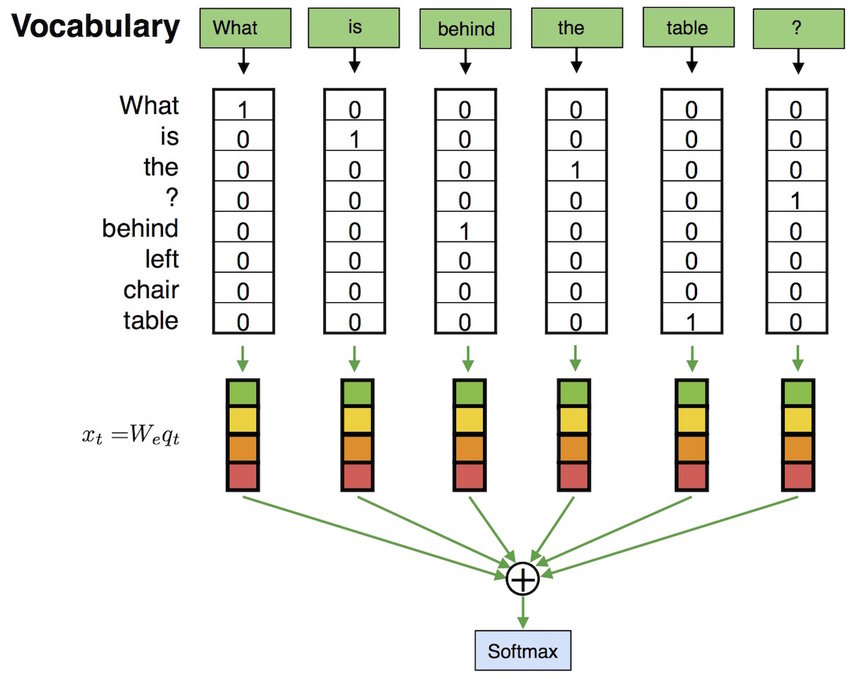
 


Figure 1. BOW representation of the input, copied from [6]. 

Ideally, the mathematical representation of a word should also represent the meaning of that word in the context of other words.

A much used approach to achieve this is to have an algorithm arrange all words in the text corpus according to their coocurrence and the words surrounding them in a multidimensional space in such a way that words that often appear in similar contexts also have a similar vector. Such algorithms use the so-called Unsupervised Learning, i.e. they independently search for the representation model that minimizes the deviations between related words without external specifications. The result is a vector representation for each word contained in the text corpus. Depending on the model, this vector has between 100 - 300 dimensions and is therefore significantly less complex than, for example, a one-hot-encoded BOW vector with 100,000 dimensions. Above all, each word vector represents at least a rudimentary representation of the semantic meaning of the word in context. Thus, pre-trained Word2Vec or GloVe models can be used to implement arithmetic with words, for example: So the vector for the word KING minus the vector for the word MAN plus the VECTOR for the word WOMAN actually results in the vector for KING (Figure 2.). This is not exact, of course, but the vector for KING is the closest vector to the result and can therefore be clearly determined as the result [18].

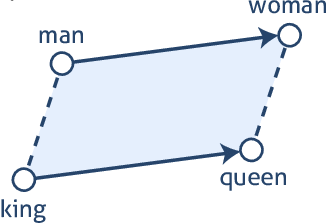




Figure 2. Analogy between the words, copied from [16]. 

Word embeddings are based on distributional hypothesis, which states that words with close meaning tend to appear in similar context.  The distributional vectors can capture the similarity between the words with metrics such as cosine similarity. In 2013 Mikolov at al. [11], from Google proposed well-known Word2Vec embedding. It applies neural networks of small size in order to calculate the word embedding that are based on context. The results of the approach were unprecedented [11]. 

In the Word2Vec (skip-gram) model, the basic idea was that it runs word by word along the text and tries to correctly predict the corresponding neighbors. It is therefore a predictive-based method, although this approach apparently also implicitly records the statistics of how often words occur together.

On year following the publication of the famous Word2Vec embedding approach, researchers from Stanfrod came up with a competing approach - GloVe [13]. In contrast to Word2Vec, GloVe assumes that the co-occurance frequency holds vital information and therefore should not be wasted as further training examples. Moreover, in the GloVe word embedding are built in a way that the combination of  word vectors is related to the probability of those words co-occurring  in the corpus [13]. 

The "GloVe" stands for "Global Vectors", since the matrix used represents global statistics for the entire document corpus.

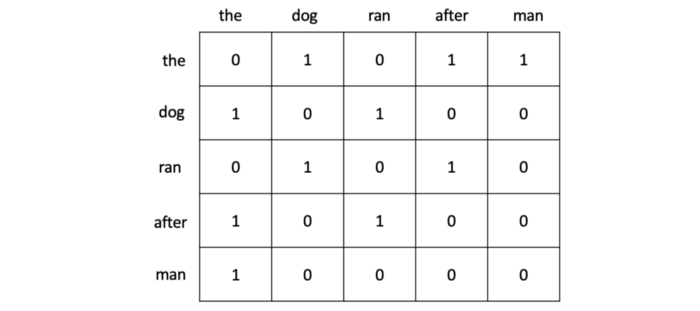

Figure 3. Co-occurence matrix used in GloVe, copied from [8]. 

## 1.3. Transfer Learning

Learning word embeddings from scratch alone can suffer from few problems like large number of trainable parameters and sparsity of training data. The former causes the training process to elongate the time considerably. The latter means that in many real world problems datasets contain large volume of rare words, hence the embeddings that are learned from the dataset are not able to achieve the right representation of the word. To solve, inter alia these problems, pretrained word embedding which are a form of transfer learning are handy. 
Transfer learning is a process of applying knowledge to a task gained during completion of the other related task. 
The main general motivation behind transfer learning in the context of deep learning is that is is very difficult to obtain big amounts of data for supervised models. Moreover training this models would require a lot of time [15]. 


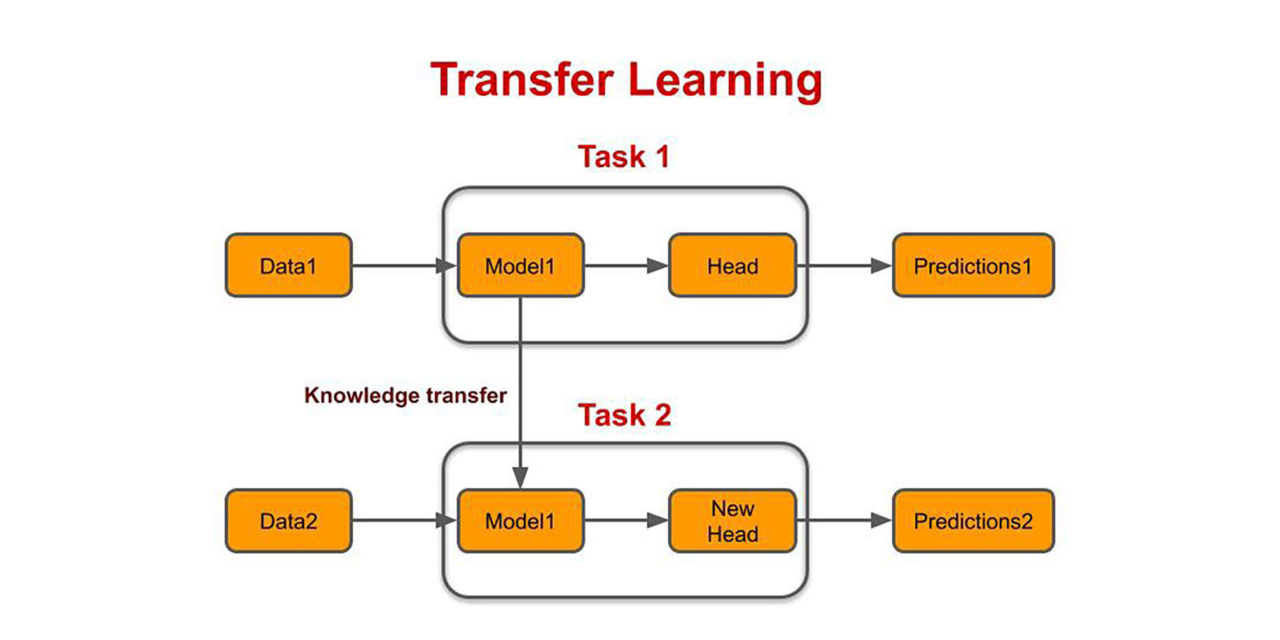

Figure 4. Transfer learning, copied from [3].




## 1.4. Pretrained Word Embeddings and Glove 


One of the examples of transfer learning in the setting of NLP Word2Vec and GloVe pre-trained embeddings could be named. They are trained on huge amound of text data in ordrer to better capture the semantic and syntactic meaning of the words.

In the recent years researchers have been trying to answear which of the proposed embeddings gives the best results. In 2017, Naili et. al, [5] found out that the approximation algorithm - negative sampling - in Word2Vec gives the best result out of ohter approximation algorithms and that Word2Vec produces the best results for the task of topic segmentation compared to GloVe. 


For the sake of presenting how an the transfer learning works in practice we are going to appply pre-trained GloVe embeddings to an NLP task in order to predict a numerical value. 
The pretrained embeddings were trained on Wikipedia articles and Gigaword 5 textual data and consist of 6 billion tokens [13]. 


But before starting with our task it is worth explaining a bit more in detail how the GloVe algorithm actually works.

The GloVe algorithm is composed of following steps as described in [9]: 

1. Gather word co-occurance statistics in a matrix X as seen in the Figure 3. As already mentioned each element i of such a matrix $ X_{ij} $ represents how frequent word $ i $ actually appears in the context of the second word $ j $. The corpus is scanned in a way that for each term we search for context words for each word within certain area specified by a window size before and after the term. Moreover, less weight is given for more distant words. Usually the decay of the weight is defined by: 

\begin{equation} decay = 1/offset \end{equation}


2. Determine soft constraints for every word pair:

\begin{equation} w_{i}^{T}w_{j} + b_{i} + b_{j} = log(X_{ij}) \end{equation}

Where $ w_{i} $ stands for the vector of the main word, $ w_{j} $ stands for the vector of a context word and $ b_{i} $ and $ b_{j} $ stand for scalar biases of the main and context words repectively. 

3. Determine the cost function


\begin{equation} J = \sum_{i=1}^{V}\sum_{j=1}^{V}f(X_{ij})(w_{i}^{T}w_{j} + b_{i} + b_{j} - log(X_{ij}))^{2} \end{equation}

In the equation f is a weighting function which aims to prevent from learning only from very common word pairs. The following function is choosen by the creators of GloVe: 

\begin{equation} f(X_{ij}) = \left\{
  \begin{array}{lr}
    (\frac{X_{ij}}{X_{max}})^{\alpha} & if  X_{ij} < XMAX\\
    1 & otherwise 
  \end{array}
\right.  \end{equation}




























# 1. 5. Datasets 
Dataset used for the purpose of solving a nlp related task is the medium dataset, containing the text contents of an article and information about it. Training and test set differ in the number of features and in their sizes.
Before preprocessing the original training set is larger than 200000 rows and test set consists of 514 rows. Initially, the number of features in the training set was roughly 50, whereas in the test around 10. Among the features enclosed in the training dataset are: number of responses, text, title and author of an article, published date, totalclapcount. The latter, totalclapcount is our target variable in the scope of our npl task. Choosing totalclapcount as our target variable means that the problem we will be facing here is a regression problem.

# 2. Working with the Data

## 2. 1. Data Preprocessing and Explorative Data Analysis

Firstly, in order to be albe to work with our data in Google Colab we need to create the connection to the google drive disc, then we will perform data pre-processing and explorative data analysis interchangebly.

In [ ]:
# Create a global variable to idicate whether the notebook is run in Colab
import sys
IN_COLAB = 'google.colab' in sys.modules


# Configure variables pointing to directories and stored files 
if IN_COLAB:
    # Mount Google-Drive
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = 'enter the path to your google drive' 
else:
    DATA_DIR = 'enter the name of your local drive' 

training_set = 'Train.csv'  
test_set = 'Test.csv'   

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In the next step some crucial libraries for data preprocessing and EDA need to be imported to our notebook. 

In [ ]:
#Importing initially required libraries 
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Next we need to load the training and test dataset. It may take some time to load them to the notebook, especially the training dataset was consising of more and 200000 rows. 

In [ ]:
# load the training data from google drive 
tr_df = pd.read_csv(DATA_DIR + training_set, delimiter = ',')

# load the test data from google drive
te_df = pd.read_csv(DATA_DIR + test_set, delimiter = ',')

As we already have our data loaded we can dive a bit into our datasets. It is important to spot the differences between two datasets. It is visible in the output of the following cells that training dataframe cosists of roughly 50 different columns, whereas test set only from 8. 

In [ ]:
#Getting the overview of the shape of both dataframes 
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279577 entries, 0 to 279576
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   audioVersionDurationSec      279577 non-null  int64  
 1   codeBlock                    25179 non-null   object 
 2   codeBlockCount               279577 non-null  float64
 3   collectionId                 137878 non-null  object 
 4   createdDate                  279577 non-null  object 
 5   createdDatetime              279577 non-null  object 
 6   firstPublishedDate           279577 non-null  object 
 7   firstPublishedDatetime       279577 non-null  object 
 8   imageCount                   279577 non-null  int64  
 9   isSubscriptionLocked         279577 non-null  bool   
 10  language                     279577 non-null  object 
 11  latestPublishedDate          279577 non-null  object 
 12  latestPublishedDatetime      279577 non-null  object 
 13 

In [ ]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          514 non-null    int64 
 1   index               514 non-null    int64 
 2   Author              514 non-null    object
 3   PublicationDetails  514 non-null    object
 4   Responses           432 non-null    object
 5   Header              506 non-null    object
 6   Text                514 non-null    object
 7   Length              514 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 32.2+ KB


In order to see some more statistics of the numerical data in our data frames we can apply describe() method for both of our datasets. We can see that some of the collumns in the training set are densely populated with Nans. Some of them are mostly null values. We can also spot for example that responsesCreatedCount is mostly populated with zeros where even 75th percentile is zero and max is only 3076 responses. Same applies to some other columns. As far as the test data frame is concerned it becomes obvious that there is not much numerical data there and some colums are called 'Unnamed: 0' and 'index' what does not look as a variable that could be used in the later analysis. 

In [ ]:
tr_df.describe() 

,audioVersionDurationSec,codeBlockCount,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,tagsCount,totalClapCount,wordCount,publicationfollowerCount,postCount,usersFollowedByCount,usersFollowedCount,scrappedDate
count,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,279577.000000,0.0,279577.000000,279577.000000,279577.000000,279577.0
mean,0.588482,1.249255,3.766948,6.869785,4.094117,26.850721,0.948404,0.071537,4.616388,184.963473,936.059633,NaN,43993.910894,1758.680582,309.302046,20181104.0
std,23.817475,7.007749,5.463126,11.962162,3.558776,290.754808,14.910367,0.297759,0.828752,1985.353004,881.097925,NaN,61306.658034,12719.741447,1627.476083,0.0
min,0.000000,0.000000,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20181104.0
25%,0.000000,0.000000,1.000000,1.000000,1.992453,0.000000,0.000000,0.000000,5.000000,0.000000,427.000000,NaN,2706.000000,10.000000,4.000000,20181104.0
50%,0.000000,0.000000,2.000000,4.000000,3.277673,2.000000,0.000000,0.000000,5.000000,8.000000,735.000000,NaN,23061.000000,63.000000,26.000000,20181104.0
75%,0.000000,0.000000,5.000000,9.000000,5.144340,8.000000,0.000000,0.000000,5.000000,72.000000,1178.000000,NaN,59190.000000,363.000000,136.000000,20181104.0
max,3266.000000,389.000000,263.000000,1180.000000,99.603774,42288.000000,3076.000000,3.000000,6.000000,291706.000000,24964.000000,NaN,331914.000000,333655.000000,85867.000000,20181104.0


In [ ]:
te_df.describe()

,Unnamed: 0,index,Length
count,514.000000,514.000000,514.000000
mean,256.500000,314.908560,6545.963035
std,148.523287,178.710808,6449.069641
min,0.000000,0.000000,251.000000
25%,128.250000,156.500000,908.750000
50%,256.500000,338.500000,5228.000000
75%,384.750000,471.750000,10433.250000
max,513.000000,602.000000,32766.000000


In [ ]:
tr_df.rename(columns={'responsesCreatedCount' : 'responses'}, inplace = True)

After some inspection of the training data frame it containes many duplicates. The rows are not exact duplicates because they differ with the tag_name, slug and name but it is still the same post and the tags are given one by one to every row. Hence, it can be concluded that for our analysis the data can be treated as duplicates and they will be taken care of in the next cells. 

In [ ]:
tr_df.head(20)

,audioVersionDurationSec,codeBlock,codeBlockCount,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,isSubscriptionLocked,language,latestPublishedDate,latestPublishedDatetime,linksCount,postId,readingTime,recommends,responses,socialRecommendsCount,subTitle,tagsCount,text,title,totalClapCount,uniqueSlug,updatedDate,updatedDatetime,url,vote,wordCount,publicationdescription,publicationdomain,publicationfacebookPageName,publicationfollowerCount,publicationname,publicationpublicEmail,publicationslug,publicationtags,publicationtwitterUsername,tag_name,slug,name,postCount,author,bio,userId,userName,usersFollowedByCount,usersFollowedCount,scrappedDate
0,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,Blockchain,blockchain,Blockchain,265164.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
1,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,Samsung,samsung,Samsung,5708.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
2,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,en,2018-09-18,2018-09-18 20:58:20,1,10007d3018fe,0.958491,2,0,0,A major private IT company implements blockcha...,5,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,ICOBox is the first and the biggest new genera...,NaN,icobox.io,NaN,ICOBox,support@icobox.io,icobox-io,"BLOCKCHAIN,ICO,ETHEREUM,ETHEREUM BLOCKCHAIN,TO...",icobox_io,It,it,It,3720.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
3,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,technology,Technology,166125.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
4,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robotics,robotics,Robotics,9103.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
5,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,en,2018-01-07,2018-01-07 17:18:38,24,1000c43bcb97,19.716981,0,0,0,Introduction,5,EPQ draft 1 (484

In [ ]:
te_df.head(20)

,Unnamed: 0,index,Author,PublicationDetails,Responses,Header,Text,Length
0,0,0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401
1,1,1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972
2,2,2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402
3,3,5,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730
4,4,7,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324
5,5,8,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comMay 30, 2018",23 responses,Cryptocurrency Trading Bible Three: Winning in...,All trading is gambling.Some people refuse to ...,32477
6,6,9,Coinbase,"Coinbase in The Coinbase BlogDec 19, 2018",67 responses,Earn cryptocurrency while learning about new d...,Coinbase’s mission is to create an open financ...,3658
7,7,11,David Gilbertson,"David Gilbertson in HackerNoon.comAug 6, 2018",31 responses,Ripple: not a cryptocurrency,"If I recall correctly, I went the whole week w...",5293
8,8,12,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJun 30, 2017",49 responses,Eight Simple Rules for Protecting Your Cryptoc...,I ran a computer consulting company for a deca...,29811
9,9,13,Indrek Lasn,"Indrek Lasn in HackerNoon.comNov 25, 2017",5 responses,Cryptocurrency Prices Straight Outta CLI 💰,Coinmon — Cryptocurrency price ticker CLI.Chec...,382


As already mentionen before, the two datasets are different columnwise to some extent. To deal with this inconvenience we are going to delete some columns from the training dataframe that are not important for our analysis and that are not helpful in extracting some of the data for the test set. To do so we first lower the column names in both dataframes and later delete the columns with the help of an prepared list. 


In [ ]:
#drop the rows in the training set that are repeating 

tr_df.drop_duplicates(inplace = True)


#which columns are available in test compared to training. 

tr_col = []
te_col = []

for col in tr_df.columns: 
    tr_col.append(col)
    
for col in te_df.columns: 
    te_col.append(col)
    
tr_col = [x.lower() for x in tr_col]
te_col = [x.lower() for x in te_col]
    
diff = [x for x in tr_col if not x in te_col]  

diff2 = [x for x in te_col if not x in tr_col]




diff



#based on tr_df.describe and insight into the dataset we allow ourself to delete these unnecessary columns. 


delete_list = ['postId', 'url', 'collectionId', 'userId', 'userName', 'name', 'createddatetime', 'firstpublisheddatetime', 'linkscount', 'publicationname', 'postcount', 'publicationdescription', 'slug', 'tag_name', 'publicationtwitterUsername', 'publicationtags', 'publicationslug', 'publicationpublicEmail', 'publicationfacebookPageName', 'publicationdomain', 'vote', 'uniqueSlug', 'url', 'updatedDatetime', 'updatedDate', 'tagsCount', 'subTitle', 'recommends', 'isSubscriptionLocked', 'latestPublishedDate', 'latestPublishedDatetime', 'readingTime', 'postId', 'createdDate', 'audioVersionDurationSec', 'codeBlock', 'codeBlockCount', 'socialRecommendsCount', 'publicationfollowerCount', 'scrappeddate', 'bio']

delete_list = [x.lower() for x in delete_list]

tr_df.columns = map(str.lower, tr_df.columns)
te_df.columns = map(str.lower, te_df.columns)


#drop unnecessary columns
tr_df.drop(delete_list, axis = 1, inplace = True)

#drop duplictes
tr_df.drop_duplicates(inplace = True)




Afer thoroughly analyzing the training and test data sets we came to the conclusion that some of the authors are the same in both datasets. This information gives us some possibilities for rethrieving some meaningful data from our training set for the test set. Moreover, as seen in the last rows of the test set some author names are saved as datas but author names are apparently available in the publicationdetails column together with a date and where it was published. So the first task will be to retrieve this information from publicationdetails column.
In the following cell we choose columns that can be meaningful for our test set and save it in tr_df_reco. We also make a copy of te_df in case somethig went wrong with the dataframe so that we can retrieve it without loading the data frame again and not go through all these steps again. 

In [ ]:
#transfer some data from training to test set e. g. usersfollowedbycount, usersfollowedcount also create average clapcount for an author

reconstruct = ['author', 'usersfollowedbycount', 'usersfollowedcount']    #list of columns that can be reconstructed in the test set based on the the training set plus author 
tr_df_reco = tr_df[reconstruct]

#make a copy just in case
te_df_copy = te_df.copy()
tr_df_reco.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72286 entries, 0 to 279572
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                72286 non-null  object 
 1   usersfollowedbycount  72286 non-null  float64
 2   usersfollowedcount    72286 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In order to change the author which is saved as a date and extract the name from publication details we have to first determine which author is saved as date. For this purpose we write a function that returns true if a string is a date and returns false if not and we save it in the new column 'author_as_date'.

In [ ]:

from dateutil.parser import parse

# a function to determine whether is a row is a date
def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False
    
    
#create an empty column     
    
te_df['author_as_date'] = te_df.apply(lambda _: '', axis=1)

#apply the function to the test dataframe 

for i in range(len(te_df)):
    te_df.loc[i, 'author_as_date'] = is_date(te_df.loc[i, 'author'])




Based on the analysis of the test set we know that the author appears in front of a month name in the publicationdetails column. Moreover, in some cases the publicationdetails also contain the information about where the article was published by making use of string 'in' which we have to capture and adjust our functions for in order to extract the author in the right way. 




In [ ]:
#names of the authors in the test set are sometimes month names. The functions below are helpers for extracting the authors names from the publicationdetails so that we can later assign the names to author names
    

month_names = ['Jan ', 'Feb ', 'Mar ', 'Apr ', 'May ', 'Jun ', 'Jul ', 'Aug ', 'Sep ', 'Oct ', 'Nov ', 'Dec ']

def search_month_in_string(string, months = month_names):
    '''
    The function first iterates through the list with month abbreviations present in the publicationdetails
    and creates a list with trues and falses based on the presence of  month name in a string. 
    Later a dictionary is created with a month name as key and true or false value from the listp list. 
    Later the listp and the dictionaty is saved to a list and given as output of the function.
    '''
    listp = []
    
    for i in range(len(month_names)): 
        listp.append(months[i] in string)
    
    diction = dict(zip(month_names, listp))
    
    list_and_dict = [listp, diction]
   
    return list_and_dict



def give_the_month(a_dictionary):
  '''
  Returns the month which was contained in the string

  '''
    
  for months, strings in a_dictionary.items():
        if strings == True:
        
            return months


In [ ]:
# Apply the above created functions to every row in the test dataframe in order to extract the author from the publicationdetails column. 


for i in range(len(te_df)):  
    if (te_df.loc[i, 'author_as_date'] == True and ' in' in te_df.loc[i, 'publicationdetails']):
        te_df.loc[i, 'author'] = te_df.loc[i, 'publicationdetails'].split(' in')[0]
    elif(te_df.loc[i, 'author_as_date'] == True and ' in' not in te_df.loc[i, 'publicationdetails'] 
         and any(search_month_in_string(te_df.loc[i, 'publicationdetails'])[0])):
        te_df.loc[i, 'author'] = te_df.loc[i, 'publicationdetails'].split(give_the_month(search_month_in_string(te_df.loc[i, 'publicationdetails'])[1]))[0]



Now that we already have the authorname in every row in the column author we can add some information from the training data frame to the test data frame based on the author name. 

In [ ]:
# Assign data from the training set where its possible to the test dataframe 



te_df_new = pd.merge(te_df.drop_duplicates(), tr_df_reco.drop_duplicates(), how='left', on='author')

We see that in publicationdetails column there is publication date hidden. We extract it and add it to a newly created column.

In [ ]:
def create_month_column(dataframe):
  '''extracts dates from publication details in a dataframe 
  '''
  for m in month_names:
    if (m in dataframe):
     dataframe = m + dataframe.split(m)[1]
  
  return dataframe

te_df_new['firstpublisheddate'] = te_df_new['publicationdetails'].apply(create_month_column)


Now that we have extracted the data we want to have it in a numeric form because it will be easier for a model to work with it. Hence, we create a function that converts a string to a timestamp, for training data frame and test data frame separately due to different date fromats in both sets. Moreover, in some rows there is no publication year so we decided to simply add year 2018 to it with help of the add_year function. 

In [ ]:
from datetime import datetime


def string_to_date_to_timestamp_te(dataframe):
  '''
  converts a string to a timestamp in a test dataframe.
  '''
  dataframe = datetime.strptime(dataframe, '%b %d, %Y')

  #timestamp in a form of a float number
  dataframe = datetime.timestamp(dataframe)
  return dataframe


def string_to_date_to_timestamp_tr(dataframe):
  '''
  converts a string to a timestamp in a training dataframe.
  '''
  dataframe = datetime.strptime(dataframe, '%Y-%m-%d')

  #timestamp in a form of a float number
  dataframe = datetime.timestamp(dataframe)
  return dataframe


def add_year(dataframe):
  if(dataframe.count(' ') == 1):
    dataframe = dataframe + ', 2018'
  
  return dataframe

#peform the functions on the training and test data frames 
te_df_new['firstpublisheddate'] = te_df_new['firstpublisheddate'].apply(add_year)

te_df_new['firstpublisheddate'] = te_df_new['firstpublisheddate'].apply(string_to_date_to_timestamp_te)

tr_df['firstpublisheddate'] = tr_df['firstpublisheddate'].apply(string_to_date_to_timestamp_tr)

#Again drop the duplicates if there are some
tr_df.drop_duplicates(inplace=True)

Back in the beginning of the notebook we could see with the help of the info() method that the responses column was an object type and the entry from ever row was in a form of a number followed by 'responses'. To be able to work with this data we need to transform it to a numeric form. There are only 2 responses above one thousand from which the comma has to be removed and to nan responses 0 is assigned. The end result of applying the function is column responses in a form of numeric float. 

In [ ]:
def responses_to_number(dataframe):

  '''first check for nan values in the responses column and if its true assign '0 responses' 
  later extract the first string, in this case always the number and then change it to float'''

  if(dataframe == '1,263 responses'):
    dataframe = '1263 responses'

  if(dataframe == '1,056 responses'):
    dataframe = '1056 responses'  

  if(dataframe == 'nan'):
    dataframe = '0 responses'

  if(',' in dataframe):
    dataframe.replace(',', '')

  dataframe = dataframe.split()[0]

  # convert to float

  dataframe = pd.to_numeric(dataframe, downcast="float")
  
  return dataframe

#apply the function responses_to_number on the 'responses' column 

te_df_new['responses'] = te_df_new['responses'].astype(str).apply(responses_to_number)

#also make sure that the data is in the same format also in the traning set
tr_df['responses'] = pd.to_numeric(tr_df['responses'], downcast="float")

In [ ]:
#copy the tr_df dataframe to tr_df_new2 in case of some errors later 

tr_df_new2 = tr_df.copy()


We raname some columns to unify the naming in both data frames. 


In [ ]:
#change the column name in the test set from header to title and length to wordcount if its not changed already 

te_df_new.rename(columns={'length': 'wordcount', 'header': 'title'}, inplace= True)

We want to make sure that the variable wordcount in the test set is right that is why we count the number of words for the text in every row. 

In [ ]:
#change the wordcount values to real wordcount values based on the number of words in the string 

f = lambda x: len(x.text.split())
te_df_new['wordcount'] = te_df_new.apply(f, axis = 1)


Since the articles in the test set are in english we do not need non english articles in our training set because since they are in minority and in different language, the articles can have different characteristics that our test set does not need to know about. Hence, we delete the rows with articles different than english from our training set. 

In [ ]:
#check in which languages are the articles written in the training dataframe

tr_df_new2.groupby('language').count()

#Delete rows with different language than english

tr_df_new2 = tr_df_new2[tr_df_new2.language == 'en']

Final check where the null values appear in our dataframes. It appears that only in title column what is not so crucial since we will not use it later for training the model so we leave it as it is. 

In [ ]:
#check where are null values appearing in the training dataframe
print(tr_df_new2.isnull().sum())

#check where are null values appearing in the test dataframe
print(te_df_new.isnull().sum())

firstpublisheddate      0
imagecount              0
language                0
responses               0
text                    0
title                   1
totalclapcount          0
wordcount               0
author                  0
usersfollowedbycount    0
usersfollowedcount      0
dtype: int64
unnamed: 0                0
index                     0
author                    0
publicationdetails        0
responses                 0
title                     8
text                      0
wordcount                 0
author_as_date            0
usersfollowedbycount    231
usersfollowedcount      231
firstpublisheddate        0
dtype: int64


# Outliers detection
We will now put our eyes on the boxplots of different columns among two datasets to see whether we should truncate and manipulate some data in order to obtain better predictions. As we can see there are some outliers in the totalclapcount column for the training dataframe but we will leave them for now because there are not so many of them and we have a lot of data so we can leave it.

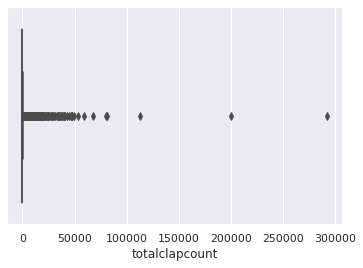

In [ ]:
sns.boxplot(x=tr_df_new2['totalclapcount'])

We also observe that there are some much more longer texts in the training data frame. We will leave the longest texts nevertheless for now. 

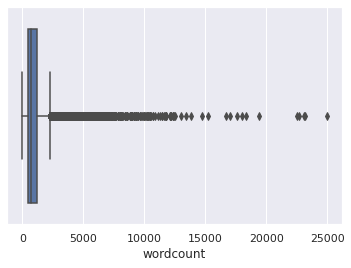

In [ ]:
sns.boxplot(x=tr_df_new2['wordcount'])

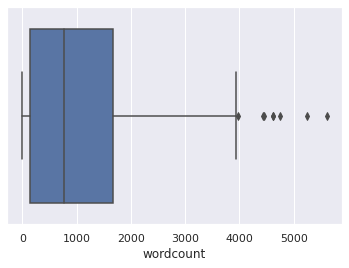

In [ ]:
sns.boxplot(x=te_df_new['wordcount'])

For 'usersfollowed' and 'usersfollowedby' column there are also many outliers. But they may give us information about very popular writers. So we will leave them for now.

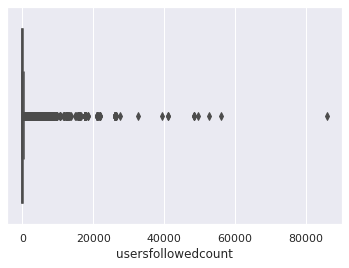

In [ ]:
sns.boxplot(x=tr_df_new2['usersfollowedcount'])

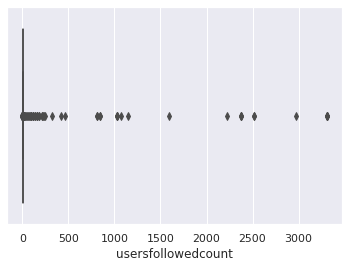

In [ ]:
sns.boxplot(x=te_df_new['usersfollowedcount'])

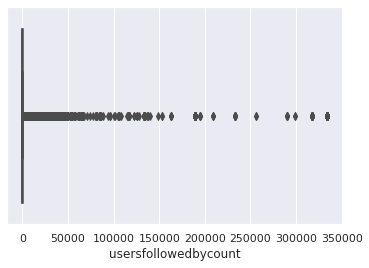

In [ ]:
sns.boxplot(x=tr_df_new2['usersfollowedbycount'])


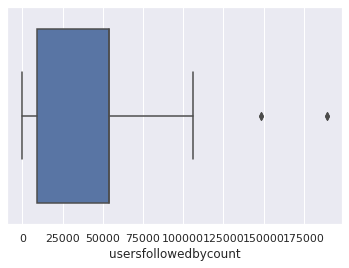

In [ ]:
sns.boxplot(x=te_df_new['usersfollowedbycount'])

Same for responses we will leave them for now.

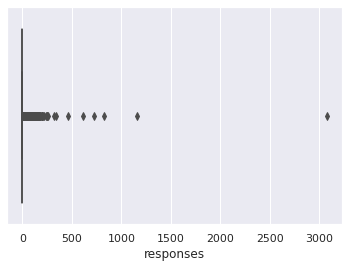

In [ ]:
sns.boxplot(x=tr_df_new2['responses'])

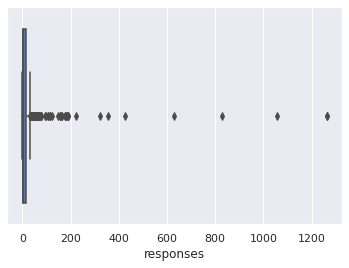

In [ ]:
sns.boxplot(x=te_df_new['responses'])

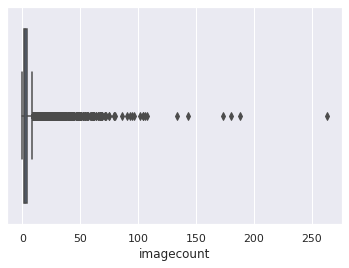

In [ ]:
sns.boxplot(x=tr_df_new2['imagecount'])

'firstpublisheddate' seems to be similar in both dataframes. 

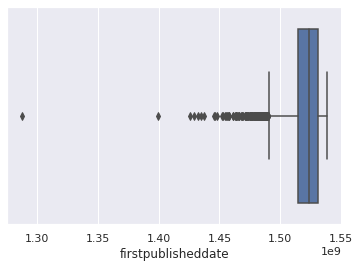

In [ ]:
sns.boxplot(x=tr_df_new2['firstpublisheddate'])

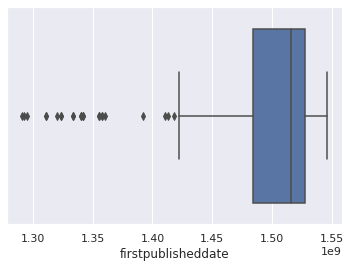

In [ ]:
sns.boxplot(x=te_df_new['firstpublisheddate'])

Looking in the correlation heatmap for training set we see thet reponses are highly correlated with totalclapcount value what makes it the most important feature for now. 

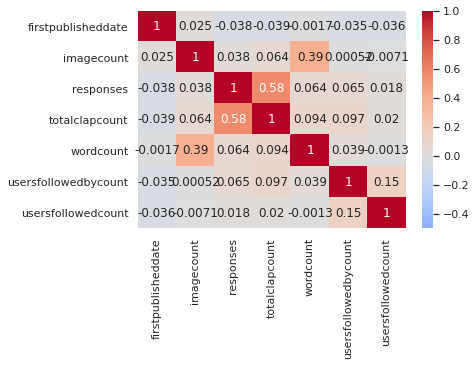

In [ ]:
sns.heatmap(tr_df_new2[['firstpublisheddate', 'imagecount', 'responses', 'totalclapcount', 'wordcount', 'usersfollowedbycount', 'usersfollowedcount']].corr(), annot = True, vmin = -0.5, vmax=1, center= 0, cmap= 'coolwarm')

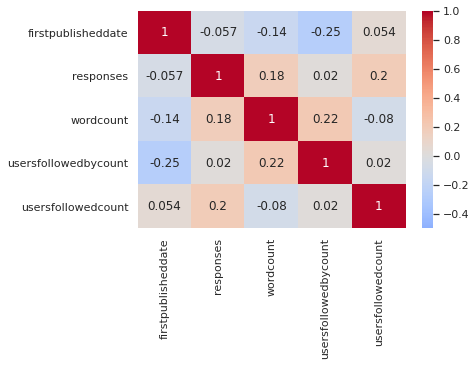

In [ ]:
sns.heatmap(te_df_new[['firstpublisheddate', 'responses', 'wordcount', 'usersfollowedbycount', 'usersfollowedcount']].corr(), annot = True, vmin = -0.5, vmax=1, center= 0, cmap= 'coolwarm')

Looking at the difference between the mean responses of the two dataframes and bearing in mind that it is such an important value we get rid of the 12000 thousand rows with the smallest responses value and add overall 12000 responses, twice 4000, and twice 2000, to the training set to increase a bit the average value of responses of the training set. 

In [ ]:
print(tr_df_new2['responses'].mean())

print(te_df_new['responses'].mean())

len(tr_df_new2)

0.9034237265586853
26.764591439688715


66331

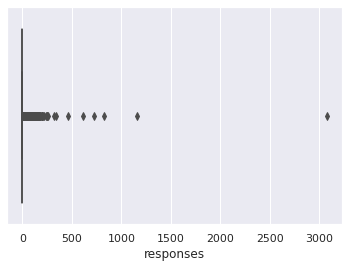

In [ ]:
#delete 12000 rows with nsmallest values in one column
tr_for_delete = tr_df_new2.nsmallest(12000, ['responses'])

tr_df_new2.drop(tr_for_delete.index, axis=0,inplace=True)

sns.boxplot(x=tr_df_new2['responses'])

#extract twice rows with nlargest values
rows_to_balance1 = tr_df_new2.nlargest(4000, columns=['responses'])
rows_to_balance2 = tr_df_new2.nlargest(4000, columns=['responses'])

#add them to the data
tr_df_new2 = pd.concat([tr_df_new2, rows_to_balance1, rows_to_balance2], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

#extract again twice rows with nlargest values
rows_to_balance3 = tr_df_new2.nlargest(2000, columns=['responses'])

rows_to_balance4 = tr_df_new2.nlargest(2000, columns=['responses'])

#add them again to the data
tr_df_new2 = pd.concat([tr_df_new2, rows_to_balance3, rows_to_balance4], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)


After our little manipulation of the data we see that our avarage responses incrased by raughly six times what is already much closer to average responses of the test set.

In [ ]:
#calculate the mean of a column
tr_df_new2['responses'].mean()

5.387420654296875

We delete now some unnecessary columns from the test set. 

In [ ]:
#delete columns from the test set that are useless. 

delete_te = ['unnamed: 0', 'index', 'publicationdetails']

te_df_new.drop(delete_te, axis = 1, inplace = True)

te_df_new

,author,responses,title,text,wordcount,author_as_date,usersfollowedbycount,usersfollowedcount,firstpublisheddate
0,Daniel Jeffries,627.0,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,3697,False,48725.0,155.0,1.501459e+09
1,Noam Levenson,156.0,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",3622,False,NaN,NaN,1.512518e+09
2,Daniel Jeffries,176.0,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,71,False,48725.0,155.0,1.500595e+09
3,Haseeb Qureshi,72.0,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,2986,False,NaN,NaN,1.518998e+09
4,William Belk,19.0,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,810,False,NaN,NaN,1.517098e+09
...,...,...,...,...,...,...,...,...,...
509,Tim Romero,181.0,"Why I turned down $500K, Pissed off my investo...",I just did what no startup founder is ever sup...,1539,True,NaN,NaN,1.465430e+09
510,Product Hunt,24.0,These Tools Will Help You Launch Your Startup,If you’re embarking on the startup journey and...,961,True,189238.0,9.0,1.465517e+09
511,Joe Procopio,24.0,Why Startups Fall Apart at 50 Employees,Fuck you startups with your extravagant partie...,76,True,812.0,1.0,1.521418e+09
512,Winerist,116.0,Beware of Startup Prostitution,Note: This is not a post to glorify prostituti...,2332,True,NaN,NaN,1.458259e+09


We can still see that some of the rows in 'usersfollowedbycount' and 'usersfollowedcount' are nans. We will populate them with the mean value for each of the columns. 

In [ ]:
X_train_reg = tr_df_new2[['wordcount',  'responses', 'firstpublisheddate']]
Y_train_reg = tr_df_new2['usersfollowedbycount']
Y_train_reg2 = tr_df_new2['usersfollowedcount']

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train_reg, Y_train_reg)

regressor2 = LinearRegression()  
regressor2.fit(X_train_reg, Y_train_reg2)

 #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
te_df_new['usersfollowedbycount'] = np.where(te_df_new.usersfollowedbycount.isnull(),
         regressor.predict(te_df_new[['wordcount',  'responses', 'firstpublisheddate']]), 
         te_df_new.usersfollowedbycount)

te_df_new['usersfollowedcount'] = np.where(te_df_new.usersfollowedcount.isnull(),
         regressor2.predict(te_df_new[['wordcount',  'responses', 'firstpublisheddate']]), 
         te_df_new.usersfollowedcount)

In [ ]:

#calculate the mean for both usersfollowedbycount	and usersfollowedcount without the outliers 

mean_no_outliers1 = te_df_new['usersfollowedbycount'].to_numpy()
mean_no_outliers2 = te_df_new['usersfollowedcount'].to_numpy()

#outliers.mean()

mean_no_outliers1 = mean_no_outliers1[np.logical_not(np.isnan(mean_no_outliers1))]
mean_no_outliers2 = mean_no_outliers2[np.logical_not(np.isnan(mean_no_outliers2))]

np.mean(mean_no_outliers1)
np.mean(mean_no_outliers2)


def reject_outliers(data, m=1.5):

  #Function rejects the outliers in the data based on m value
  return data[abs(data - np.mean(data)) < m * np.std(data)]

mean_no_outliers1 = reject_outliers(mean_no_outliers1)
mean_no_outliers2 = reject_outliers(mean_no_outliers2)


mean_for_followedby = np.mean(mean_no_outliers1) 
mean_for_followed = np.mean(mean_no_outliers2)


te_df_new['usersfollowedbycount'].fillna(mean_for_followedby, inplace=True)
te_df_new['usersfollowedcount'].fillna(mean_for_followed, inplace=True)

Before further operating with the data we first copy the data frames and then again drop some unnecessary columns from both sets.

In [ ]:
#also make copies of our dataframes and start working on them
tr_text = tr_df_new2.copy()

te_text = te_df_new.copy()

tr_text.drop(['language', 'title', 'author'], axis = 1, inplace = True)

te_text.drop(['author', 'title', 'author_as_date'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

In [ ]:
tr_text

,firstpublisheddate,imagecount,responses,text,totalclapcount,wordcount,usersfollowedbycount,usersfollowedcount
32,1.482538e+09,11,2.0,The Meta Model and Meta Meta-Model of Deep Lea...,271,1162,20169.0,750.0
39,1.523146e+09,1,1.0,Don’t trust “Do you trust this computer”\nfrom...,233,673,72.0,11.0
80,1.512346e+09,7,1.0,Five tech trends that shaped 2017\n“The histor...,102,892,7926.0,1389.0
85,1.527811e+09,8,1.0,Vectorized implementation of back-propagation\...,38,1117,178.0,99.0
194,1.528330e+09,1,2.0,Upcoming TensorFlow events in June and beyond\...,194,807,10947.0,4.0
...,...,...,...,...,...,...,...,...
265646,1.509408e+09,1,13.0,Robot Granted Citizenship in Saudi Arabia\nHan...,38,303,20.0,9.0
266400,1.527984e+09,3,13.0,Implementing YOLO v3 in Tensorflow (TF-Slim)\n...,951,3315,79.0,20.0
266836,1.517270e+09,4,13.0,Bokeh vs Dash — Which is the Best Dashboard Fr...,1615,1213,379.0,307.0
266992,1.529107e+09,20,13.0,Visualization of a convolutional neural networ...,3394,2907,273.0,18.0


In [ ]:
tr_text

,firstpublisheddate,imagecount,responses,text,totalclapcount,wordcount,usersfollowedbycount,usersfollowedcount
32,1.482538e+09,11,2.0,The Meta Model and Meta Meta-Model of Deep Lea...,271,1162,20169.0,750.0
39,1.523146e+09,1,1.0,Don’t trust “Do you trust this computer”\nfrom...,233,673,72.0,11.0
80,1.512346e+09,7,1.0,Five tech trends that shaped 2017\n“The histor...,102,892,7926.0,1389.0
85,1.527811e+09,8,1.0,Vectorized implementation of back-propagation\...,38,1117,178.0,99.0
194,1.528330e+09,1,2.0,Upcoming TensorFlow events in June and beyond\...,194,807,10947.0,4.0
...,...,...,...,...,...,...,...,...
265646,1.509408e+09,1,13.0,Robot Granted Citizenship in Saudi Arabia\nHan...,38,303,20.0,9.0
266400,1.527984e+09,3,13.0,Implementing YOLO v3 in Tensorflow (TF-Slim)\n...,951,3315,79.0,20.0
266836,1.517270e+09,4,13.0,Bokeh vs Dash — Which is the Best Dashboard Fr...,1615,1213,379.0,307.0
266992,1.529107e+09,20,13.0,Visualization of a convolutional neural networ...,3394,2907,273.0,18.0


We first want to merge two frames to perform the same standardization for both frames merged as one. If we compare measurements that have different units, it is important to standardize the features around the center and 0 with a standard deviation of 1 because variables calculated at various scales do not contribute equally to the study and may potentially establish some bias. Moreover, deep learning neural network models train better with rescaled data because a target variable with a wide range of values will result in broad gradient error values causing a drastic shift in the weight values, rendering the learning process unstable [4].

In [ ]:
#te_text = te_text_original.copy()

frames = [tr_text, te_text]

tr_text = pd.concat(frames, keys=['tr', 'te'])

tr_text

min_y = tr_text['totalclapcount'].min()

max_y = tr_text['totalclapcount'].max()

standardizer = StandardScaler().fit(tr_text[['wordcount',  'responses','usersfollowedbycount', 'usersfollowedcount', 'firstpublisheddate']])

tr_text[['wordcount', 'responses', 'usersfollowedbycount', 'usersfollowedcount', 'firstpublisheddate']] = standardizer.transform(tr_text[['wordcount', 'responses', 'usersfollowedbycount', 'usersfollowedcount', 'firstpublisheddate']])

      
te_text = tr_text.loc['te']


tr_text = tr_text.loc['tr']


# Calculate the mean and standard error

mean_y = tr_text['totalclapcount'].mean()
std_y = tr_text['totalclapcount'].std()

#rescale the 'totalclapcount' column with a new function

def standard(dataframe):
  dataframe = (dataframe - mean_y)/std_y
  return dataframe 

tr_text['totalclapcount'] = tr_text['totalclapcount'].apply(standard)

#Split the data into a test and trainig set


X_trainNum, X_testNum, y_train, y_test = train_test_split(tr_text[['wordcount', 'responses', 'usersfollowedbycount', 'usersfollowedcount', 'firstpublisheddate']], tr_text['totalclapcount'], test_size=0.25, random_state=111)

X_validNum = te_text[['wordcount', 'responses', 'usersfollowedbycount', 'usersfollowedcount', 'firstpublisheddate']]

# 2.2. Preprocessing the Text Data.

There are few steps that are usually followed in order to prepare the textual data for being able to be applied in a model. They are as follow: 


- deleting punctuations and some html content 
- deleting sparse terms, particular words and stop words where stop words are words like 'is', 'the', 'a'. They are removed because they do not carry a lot of valuable information.
- lemmatization - that is a reduction of inflected and varied word forms to their lemmas (basic form), lexicon entries by looking them up in an electronic dictionary. Within the process the word is transformed to its actual root as seen in the Figure 5. It recognizes different forms of a word like adjective or a noun.
- tokenization - which is a way to divide a text element into smaller units called tokens. Tokens here may be either words, characters, or subwords. 
To obtain tokens, tokenisation is performed on the corpus [17]. In our case we will perform tokenization on words.

For this specific task there is a package: __nltk__ that will make our job a bit less complicated.


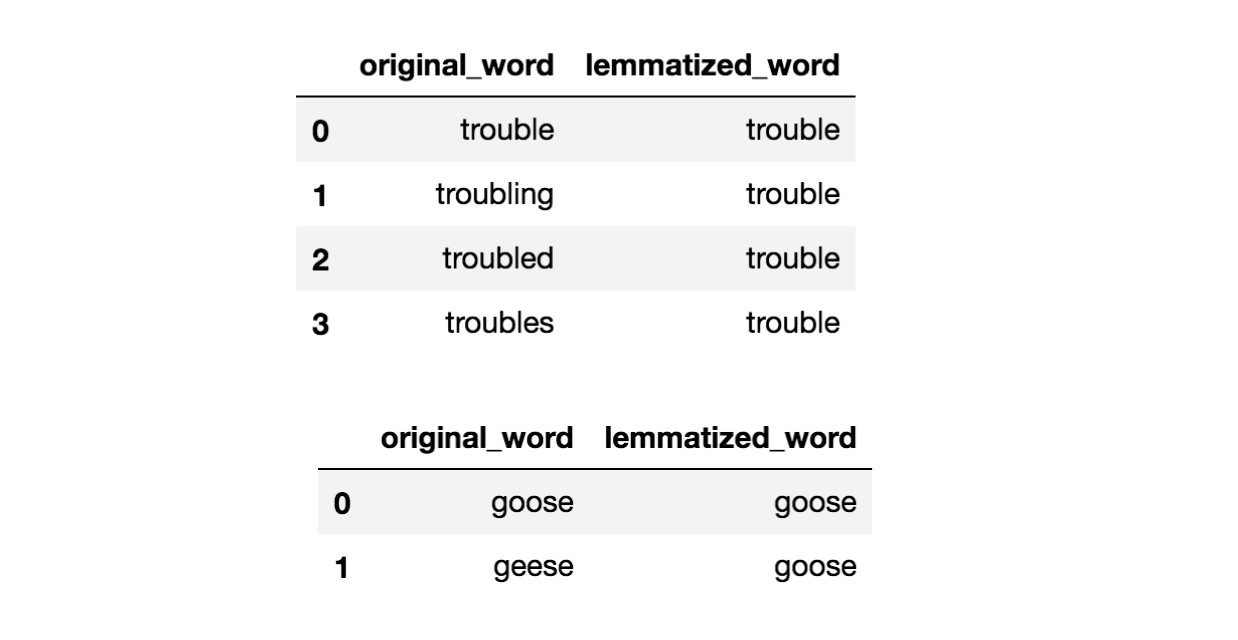

Figure 5. Lemmatization example, copied from [2]. 


First in the cell below we load all of the necessary libraries required for text processing, as well as pickle which is a library for saving objects, in case we do not want to preprocess the text all over again every time we run our notebook.
The code for text preprocessing was taken from [10]. 



In [ ]:
# Libraries for standard NLP workflow

import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Library re provides regular expressions functionality
import re

# To keep an eye on runtimes
import time

# Saving and loaded objects
import pickle

# Library beatifulsoup4 for handling html
from bs4 import BeautifulSoup


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


The helper function get_wordnet_pos() will allow us to tag a lemmatized words with its correct grammatical form - an adjective, a noun, a verb or an adverb. 

In [ ]:
# Lemmatize with POS Tag
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



Function clean_text() performs all of the necessery steps to transform the 'dirty' text into a clean one. It deletes the html contend, non-alphabetic characters and stopwords. It lemmatizes words and tokenizes sentences. 

In [ ]:
def clean_text(df):
    """ The function aims to conduct an usual NLP pre-processing chain tasks consisting of the removal of stopwords, non-alphanumeric characters, and html tags.
        Words are subject to lemmatization using their POS tags, which are determined using WordNet. 
    """
    texts = []

    lemmatizer = WordNetLemmatizer()
    
    print('*' * 40)
    print('Cleaning {} article texts.'.format(df.shape[0]))
    counter = 0
    for text in df:
        
        
        # delete html content
        post_text = BeautifulSoup(text).get_text()
        
        # delete non-alphabetic characters
        post_text = re.sub("[^a-zA-Z]"," ", post_text)
    
        # tokenize the sentences
        words = word_tokenize(post_text.lower())
  
        # filter stopwords
        words = [w for w in words if w not in stopwords.words("english")]
        
        # lemmatize each word to its lemma
        lemma_words =[lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in words]
    
        texts.append(lemma_words)
              
        if (counter > 0 and counter % 500 == 0):
            print('Processed {} reviews'.format(counter))
            
        counter += 1
        
    print('DONE')
    print('*' * 40)

    return(texts)

We merge our two dataframes together to be able to clean the text in one go. 

In [ ]:
frames = [tr_text, te_text]

tr_text = pd.concat(frames, keys=['tr', 'te'])

tr_text

firstpublisheddate  ...  usersfollowedcount
tr 32            -3.255803  ...            0.189478
   39             0.157073  ...           -0.187700
   80            -0.750607  ...            0.515618
   85             0.549191  ...           -0.142786
   194            0.592759  ...           -0.191273
...                    ...  ...                 ...
te 509           -4.693568  ...            0.305621
   510           -4.686307  ...           -0.188721
   511            0.011844  ...           -0.192804
   512           -5.296268  ...            0.296753
   513           -0.474672  ...            1.494037

[66845 rows x 8 columns]

We call a function on the text column of a dataset. This operation takes a while. 

In [ ]:
#call the clean_text function in order to clean the text
texts = clean_text(tr_text.text)

Because it takes a quite considerable amount of time to pre-process the text it makes sense to save the pre-processed clean text to a file so that we do not have to perform this operation all over again.

In [ ]:
#Save the whole file to a datafile

with open('/content/drive/My Drive/medium_clean6.pkl','wb') as path_name:
    pickle.dump(texts, path_name)


In [ ]:
# In the case we do not have time to process the notebook

# 'rb' specifies 'read (open in binary mode)'
with open('/content/drive/My Drive/medium_clean6.pkl','rb') as path_name:
    texts = pickle.load(path_name)

The reviews that have been cleaned are stored as lists. Now we revert the tokenization and create one long string for each review to store the cleaned reviews in one column 'text_clean' of our data frame. We conduct this process with TreebankWordDetokenizer and afterwords we split our data.

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

tr_text['text_clean'] = [TreebankWordDetokenizer().detokenize(text) for text in texts]

Then again we split our data to two different data frames. We will from here use the term validation set for the original test set for which we have to make predictions. 

In [ ]:
te_text = tr_text.loc['te']

tr_text = tr_text.loc['tr']

#Split the data into a test and trainig set

X_train, X_test, y_train, y_test = train_test_split(tr_text['text_clean'], tr_text['totalclapcount'], test_size=0.25, random_state=111)

X_valid = te_text['text_clean']

In order to get some more understanding of our data we create word counter. 

In [ ]:
# By looping throgh words update the word counter

import collections

counter_word = collections.Counter()
for r in texts:
    for w in r:
        counter_word.update({w: 1})
        
counter_word.most_common(20)

[('data', 472235),
 ('use', 351460),
 ('learn', 316408),
 ('ai', 255987),
 ('model', 218891),
 ('one', 202640),
 ('make', 196591),
 ('time', 180538),
 ('machine', 174071),
 ('like', 165369),
 ('work', 153776),
 ('get', 151198),
 ('need', 142214),
 ('well', 135892),
 ('new', 132389),
 ('also', 130302),
 ('human', 120711),
 ('take', 117837),
 ('network', 116632),
 ('go', 114172)]


Dimensionality of Word Embedding - as stated in [19] the influence  of the dimensionality on the models perfomance is huge but not yet fully understood. Very small ones tend not to capture all of the word relations whereas the ones with very large dimensionality tend to overfit. Frequently used dimension is 100 and in this work it is goint to be used [19]. 

It would be possible to train the word embeddings on the data that we posses. But there exist pre-trained embeddings, that have been trained on a much larger amount of words, and are made available online. They usually give much better resultst because of the amount of the words that they have been trained on. It is also possible to later fine-tune the pre-trained embedding to fit it a bit better to our data.  

We also make use of Gensim that is a library for unsupervised learning in the language environment. It allows to work with Word-Embeddings among other things. 
The code for loading the embeddings and preparing them is taken from 
[10]. 


In [ ]:
#Download libraries for working with pre-trained embeddings
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# assign the number of different words to a variable
NUM_WORDS = len(counter_word)  

Keras takes a sequence of integers as input, that represent (sparse) one-hot-encoded words. That is why we build a tokenizer object with oov_token which ensures that new words in our vocabulary are mapped to special index made for it. The text is converted to sequences to fulfill the requirement for the input form. We do it for our training, test and validation set. 

In [ ]:
# Create tokenizer object and build vocab from the training set.
tokenizer_obj = Tokenizer(NUM_WORDS, oov_token=1)
# Fit the tokenizer to the text data within the training set
tokenizer_obj.fit_on_texts(X_train)  # words that are not part of the training data. The argument oov_token ensures that such new words are mapped to the specified index

# Convert the text from the training set to sequences of integer values
X_tr_int = tokenizer_obj.texts_to_sequences(X_train)

# Convert to sequences for test set 
X_ts_int = tokenizer_obj.texts_to_sequences(X_test)

# Convert to sequences for validation set
X_valid_int = tokenizer_obj.texts_to_sequences(X_valid) 

In [ ]:
# Determine the maximum text length in the training set
max_text_length = max([len(text) for text in X_tr_int])
print('The longest text of the training set has {} words.'.format(max_text_length))

The longest text of the training set has 12918 words.


## 2. 3. Implementing GloVe.

We pad the text data. For the texts that are shorter than MAX_TEXT_LENGTH 0 will be added to every missing word. The longer texts will be truncated. Performing this operation one has to be very careful. 
By inquiring the shape we want to make sure that the data is right.  

In [ ]:
MAX_TEXT_LENGTH = 400

In [ ]:
X_tr_int_pad = pad_sequences(X_tr_int, MAX_TEXT_LENGTH)

X_ts_int_pad = pad_sequences(X_ts_int, MAX_TEXT_LENGTH)

X_valid_int_pad = pad_sequences(X_valid_int, MAX_TEXT_LENGTH)

X_tr_int_pad.shape, y_train.shape, X_ts_int_pad.shape, y_test.shape

((49748, 400), (49748,), (16583, 400), (16583,))

We construct a function which will be used for creating an embedding matrix for our corpus. This matrix of pre-trained embedding will work similarly to a lookup table. Keras expects to lookup for a word with an index j in the j'th row of the embedding matrix.
Our corpus probably includes some words for which there is no embedding in our pretrained embeddings. In our case we will assign value 0 to such words. 


In [ ]:
def get_embedding_matrix(tokenizer, pretrain, vocab_size):
    '''
        Helper function to construct an embedding matrix for 
        the focal corpus based on some pre-trained embeddings.
    '''
    
    dim = 0
    if isinstance(pretrain, KeyedVectors) or isinstance(pretrain, Word2VecKeyedVectors):
        dim = pretrain.vector_size       
    elif isinstance(pretrain, dict):
        dim = next(iter(pretrain.values())).shape[0]  # get embedding of an arbitrary word
    else:
        raise Exception('{} is not supported'.format(type(pretrain)))
    
    
    # Initialize embedding matrix
    emb_mat = np.zeros((vocab_size, dim))

    # There will be some words in our corpus for which we lack a pre-trained embedding.
    # In this tutorial, we will simply use a vector of zeros for such words. We also keep
    # track of the words to do some debugging if needed
    oov_words = []
    # Below we use the tokenizer object that created our task vocabulary. This is crucial to ensure
    # that the position of a words in our embedding matrix corresponds to its index in our integer
    # encoded input data
    for word, i in tokenizer.word_index.items():  
        # try-catch together with a zero-initilaized embedding matrix achieves our rough fix for oov words
        try:
            emb_mat[i] = pretrain[word]
        except:
            oov_words.append(word)
    print('Created embedding matrix of shape {}'.format(emb_mat.shape))
    print('Encountered {} out-of-vocabulary words.'.format(len(oov_words)))
    return (emb_mat, oov_words)

We load pretrained GloVe embeddings from the drive file.

In [ ]:
# Load GloVe embeddings

glove_index = {}
with open('/content/drive/My Drive/glove/glove.6B.100d.txt', 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_index[word] = coefs

print('Found %s word vectors.' % len(glove_index))

Found 400000 word vectors.


We create our own embedding matrix with pretrained word embeddings. The following code makes use of our helper function, the loaded embedding and tokenizer_obj. We can also lookup how one embedding for an exemplary word looks like. 

In [ ]:
glove_weights, _ = get_embedding_matrix(tokenizer_obj, glove_index, NUM_WORDS)

glove_weights[tokenizer_obj.word_index['data'], :]

Created embedding matrix of shape (207180, 100)
Encountered 97174 out-of-vocabulary words.


array([-0.47099   ,  0.61576998,  0.68968999, -0.18149   ,  0.30778   ,
       -0.84149998, -0.41872999, -0.20013   ,  0.28184   , -0.34005001,
        0.77285999, -0.22774   ,  0.059854  , -0.24141   ,  0.87783003,
        0.72043002,  0.64295   ,  0.36245   ,  0.41621   ,  0.13000999,
       -0.47073999, -0.44664001,  0.47363001,  0.40755001, -1.03410006,
       -1.14219999,  0.37436   ,  0.24631   , -0.67290998,  0.49177   ,
        0.46506   ,  0.13608   , -0.93796003,  0.51887   ,  0.51549   ,
       -0.26506001, -0.14551   ,  0.22517   ,  0.35244   , -0.79648   ,
       -0.42247   , -0.90587002, -0.83998001,  0.45365   , -0.72494   ,
       -0.12592   ,  0.43661001, -0.53661001,  0.020523  , -0.74608999,
        1.1925    ,  0.15719   ,  0.29317999,  0.92660999,  0.48236001,
       -1.829     , -0.012697  , -0.37029001,  2.36179996,  0.33587   ,
       -0.15440001,  0.14657   , -0.11307   , -0.02493   ,  0.31933001,
        0.28815001, -0.29629999, -0.33032   ,  1.47739995,  0.23

## 2. 4. Model Architecture
Our data consists of numerical and text data. Hence we will have to adjust the model a bit to our requirements to be able to work with both of these datatypes in one model. 
Model's architecture is as followed:
- for the numerical data we use Multilayer Perceptron (MLP), a type of feedforward artificial neural network. It belongs to a group of supervised learning algorithms. From a given set of features $ X = x_{1}, x_{2},...,x_{m} $ and a target $ y $ with dimension $ o $ it learns a function $ f(\cdot): R^{m} \to R^{o} $ as seen in Figure 6. [1]. 
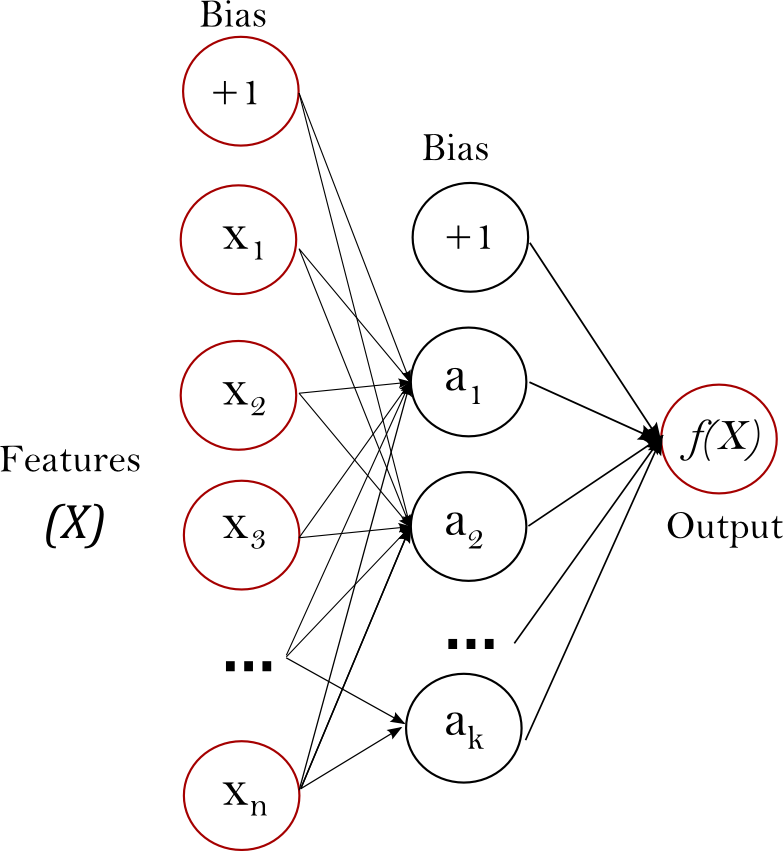

Figure 6. One hidden layer MLP, copied from [1]. 


- for the text data we use a GRU layer (Gated Recurrent Unit). Training models with GRU layers is faster than those with LSTM layers. The models like GRU and LSTM are convenient for our task because they are able to take as input already embedded text. With many time steps and as many units some information might get lost. GRU comes in handy in these situations. They possess a mechanism that chooses when to reset or update the hidden state $ h $. In our figure we see that $ R_{t} $ stands for the reset gate and $ Z_{t} $ for the update gate. In GRU candidate hidden state is first calculated, also with the help of the reset gate and previous hidden state, to be later used together with update gate to update the previous hidden state and pass the new updated hidden state to the next unit. The output dimension depends on our needs. If we had another GRU layer on the top of the first one with the same shape we would need some output from every unit. But if we used only one GRU layer and the rest of the models is a simple feedforward neural network we need the output only from the last unit [19]. 



- we merge the outputs of both MLP and GRU into one feed forward layer that is followed by one node layer that predicts the 'totalclapcount'. 
The architecture of the whole network is visible in Figure [7]. 


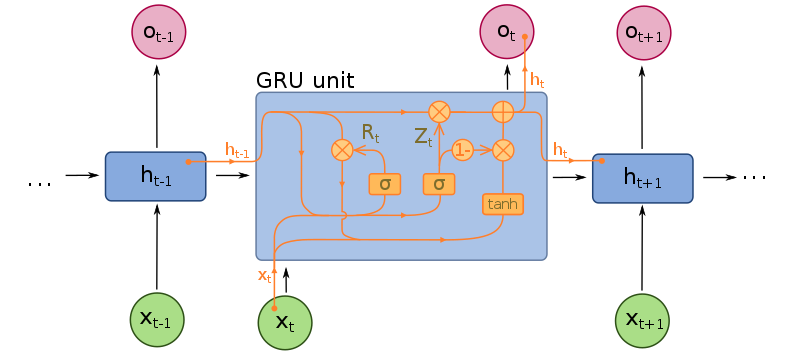
Figure [ ] ,copied from [19]

We set some important parameters like the number of epochs, batch size, embedding dimension and the validation split percentage. We choose six for epochs because this value consitently gave better results than eight.
We choose batch size of 32 so that we can speed up a bit our training process. 

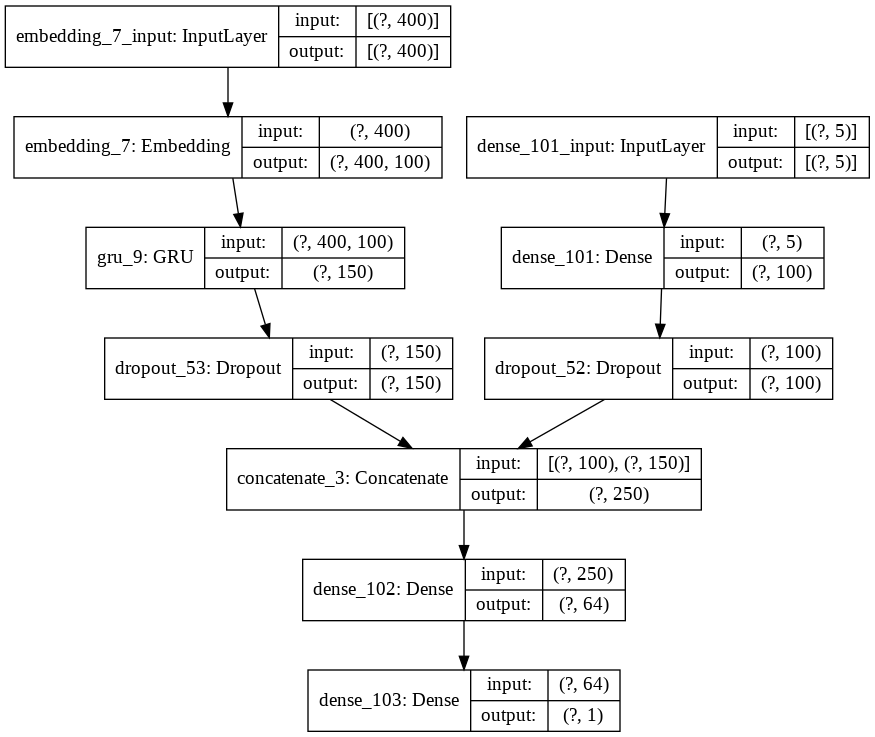

In [ ]:
# Some variables to centralize the configuration of deep learning models
EPOCH = 6
BATCH_SIZE =32
EMBEDDING_DIM = 100
VAL_SPLIT = 0.25  # fraction of the training set used for validation

We download necessary libraries for creating our model from tensorflow.keras and from keras.

In [ ]:
# Load models 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, GRU, Dropout, LSTM, TimeDistributed, concatenate
#from tensorflow.keras.layers.embeddings import Embedding
from tensorflow.keras.initializers import Constant

from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model

import keras

### Replicability of the results

In order to ensure the replicability of the results some adjustments to the code have to be made. It is important that the seed is set for tensorflow, numpy and pyhon itself. Afterwards the number of threads on which tensorflow is performing computations has to be set to 1. 
Moreover, for every layer of our network the kernel has to be initialized and its seed has to be set as can be seen in the cell where the network with its layers is defined. 

In [ ]:
#from numpy.random import seed

import tensorflow.compat.v1 as tf

import random as rn 
import os
os.environ['PYTHONHASHSEED']=str(66)

#Set random seed for numpy, python and tensorflow
np.random.seed(66)
rn.seed(66)
tf.set_random_seed(66)

from tensorflow.compat.v1.keras import backend as K

# Set the number of threads to 1 
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In the cell below we first define a function that creates architecture for the MLP part of our network. In our case one Dense layer of size 100 proved to give the best results. Further, we define the embedding layer with the NUM_WORDS as the input dimension, and with the glove_weights, and we do not tweak the embedding alongside with the model. Lastly, we define a function that creates the network for text data and adds embeddings.

After the hidden Dense and GRU layers we always add a dropout layer. 
Dropout is a regularization method used in artificial neural networks to reduce the risk of overfitting.
During the training of the network, a previously specified number of neurons in each layer of the network is switched off ("dropout") and not considered for the next calculation step. This is a very effective way to train neural networks. 



In [ ]:
# Define the architecture of the MLP

def create_mlp(dim, size, regress = False):
  #define the MLP network
  model = Sequential()
  model.add(Dense(size, kernel_initializer=keras.initializers.glorot_uniform(seed=66), input_dim = dim, activation = 'relu'))
  model.add(Dropout(0.2))

  
  # if regress True creates a network only for the numeric data
  if regress:

    model.add(Dense(1, activation="linear", kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
  # return our model
  return model


# Define the embedding layer 

embedding_layer=Embedding(input_dim=NUM_WORDS, 
                        output_dim=EMBEDDING_DIM, 
                        input_length=MAX_TEXT_LENGTH,
                        embeddings_initializer=Constant(glove_weights), 
                        trainable=False) 

# Define the architecture of GRU Layers

def create_gru(regress = False, embedding = embedding_layer, optimize= 'sgd', learning_rate = 0.01, nesterov = True, dropout = 0.4):


  model=Sequential()
  
  #add the embedding layer                        
  model.add(embedding)

  #add GRU layer
  model.add(GRU(150, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation="relu"))

  #add dropout layer
  model.add(Dropout(dropout))

  
  if regress:
     model.add(Dense(1, activation="linear", kernel_initializer=keras.initializers.glorot_uniform(seed=66)))


  return model

We call the previously defined functions. 

In [ ]:
mlp = create_mlp(X_trainNum.shape[1], size = 100, regress=False)
gru = create_gru(regress=False)

In order for our network to be able to work with MPL and GRU 'branch' we concatenate their outputs. After concatenating them we add a new hidden layer to run the all of the data through one common layer. 

In [ ]:
# concatenate outputs

combinedInput = concatenate([mlp.output, gru.output])


x = Dense(64, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation = 'relu')(combinedInput)

x = Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation="linear")(x)

# define the strutcure of the input to the model 

model = Model(inputs=[mlp.input, gru.input], outputs=x)

Before we run our model we define the learning rate and decay for adam optimizer. In our case the former performs the best with value 0.001 and the latter with 0.000001. Since we are dealing with a regression problem we choose our loss function to be the marginal squared error. 

As the optimization algorithm we choose Adam. Researchers Howard and Ruder [21] found this algorithm to work especially well for NLP tasks when the parameters are set in an appropriate way. Adam could be described as an extension of Stochastic Gradient Descent algorithm and as adaptive learning rate method. It estimates the first two moments of a gradient to adapt learning rate for each weight of a neural network. 

As our loss function we choose Mean Squared Error (MSE) because it is appropriate for regression problems. It is a mean of squarred differences between actual and predicted value. One important advantage of MSE is the fact that it penalizes bigger errors relatively more compared to smaller ones.

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  [(None, 400)]        0                                            
__________________________________________________________________________________________________
dense_5_input (InputLayer)      [(None, 5)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 400, 100)     20718000    embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          600         dense_5_input[0][0]              
_______________________________________________________________________________________

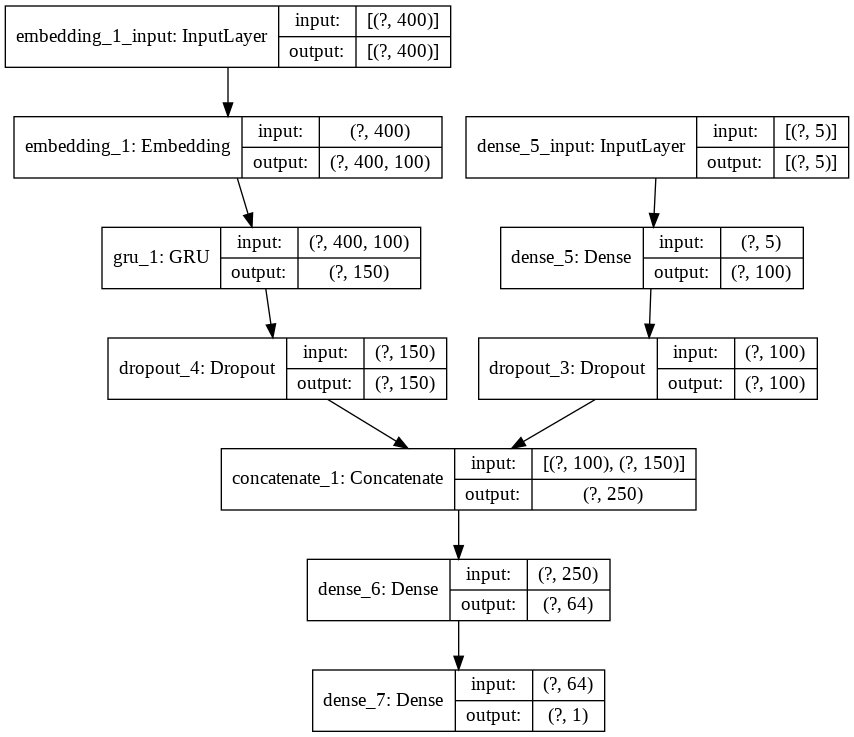

In [ ]:
adam= optimizers.Adam(lr=1e-3, decay=1e-6)

model.compile(loss="mse", optimizer="adam")
model.summary()

model_story = model.fit(
    
    x = [X_trainNum, X_tr_int_pad], y = y_train,
    batch_size=BATCH_SIZE,
    epochs=6,
    validation_split=VAL_SPLIT
)

plot_model(model, to_file= DATA_DIR + 'model_plot.png', show_shapes=True, show_layer_names=True)


After our model is trained on the data we want to dignose how it performed at each epoch and what the final performance of the model is on the test set. Code is taken from [10]. 

In [ ]:
# Assess and store the model
SCORE_BAG = {}
from sklearn import metrics

import matplotlib.pyplot as plt


def diag_model(model, story, x_ts, y_ts):
    ''' 
        Diagnose fitted keras models by plotting results from the
        story (e.g., development of training loss)
    '''
    score = model.evaluate(x_ts, y_ts, verbose=0)
 
    print('Test loss:', score)

    plt.plot(story.history['loss'])
    plt.plot(story.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return score

Test loss: 0.04785575717687607


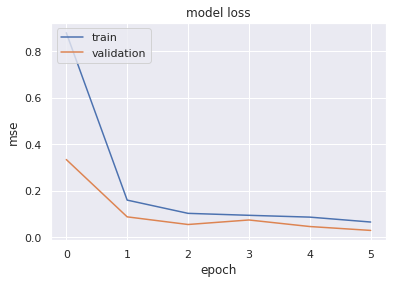

In [ ]:
#Assess classification models 

SCORE_BAG.update( {'M1': diag_model(model, model_story, [X_testNum, X_ts_int_pad], y_test)})

# save the evaluation result to a variable

score_full_test = model.evaluate([X_testNum, X_ts_int_pad], y_test, verbose=0)

# save loss at each epoch to a variable

loss = model_story.history['loss']

# save validation loss at each epoch to a variable

valid_loss = model_story.history['val_loss']




In [ ]:
#from numpy.random import seed

import tensorflow.compat.v1 as tf

import random as rn 
import os
os.environ['PYTHONHASHSEED']=str(66)

#Set random seed for numpy, python and tensorflow
np.random.seed(66)
rn.seed(66)
tf.set_random_seed(66)

from tensorflow.compat.v1.keras import backend as K

# Set the number of threads to 1 
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

After training the model on both types of data we want to check out how the loss is going to perform if we use only numeric features as our explanatory features with only MLP used as models layers.  

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3_input (InputLayer)   [(None, 5)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               900       
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1166/1166 [==============================] - 1s 1ms/step - loss: 0.7397 - val_loss: 0.4709
Epoch 2/50
1166/1166 [==============================] - 1s 1ms/step - loss: 0.5612 - val_loss: 0.3805
Epoch 3/50
1166/1166 [========================

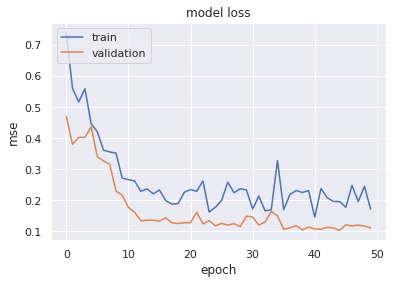

In [ ]:
# Define a model with only Dense layers 

mlp_only = create_mlp(X_trainNum.shape[1], size= 150, regress=False)

x = Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation="linear")(mlp_only.output)

model_num = Model(inputs = mlp_only.inputs, outputs=x)

adam= optimizers.Adam(lr=1e-3, decay=1e-6)

# Compile the model
model_num.compile(loss= 'mse', optimizer="adam")
model_num.summary()

# Fit the model
model_story_num = model_num.fit(
    
    x = X_trainNum, y = y_train,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_split=VAL_SPLIT
)

# Plot model's architecture
plot_model(model_num, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Evaluate the model 
SCORE_BAG.update( {'M2': diag_model(model_num, model_story_num, X_testNum, y_test)})

# save the evaluation result to a variable


score_full_test_num = model_num.evaluate([X_testNum, X_ts_int_pad], y_test, verbose=0)

# save loss at each epoch to a variable
loss = model_story_num.history['loss']

# save validation loss at each epoch to a variable
valid_loss = model_story_num.history['val_loss']



In [ ]:
#from numpy.random import seed

import tensorflow.compat.v1 as tf

import random as rn 
import os
os.environ['PYTHONHASHSEED']=str(66)

#Set random seed for numpy, python and tensorflow
np.random.seed(66)
rn.seed(66)
tf.set_random_seed(66)

from tensorflow.compat.v1.keras import backend as K

# Set the number of threads to 1 
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Now we want to check out how the loss is going to perform if we use only text data as our explanatory features with only GRU used as a hidden layer.  

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_input (InputLayer) [(None, 400)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 400, 100)          20718000  
_________________________________________________________________
gru_1 (GRU)                  (None, 150)               113400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 20,831,551
Trainable params: 113,551
Non-trainable params: 20,718,000
_________________________________________________________________
Epoch 1/10
1166/1166 [==============================] - 481s 412ms/step - loss: 1.0150 - val_loss: 0.8

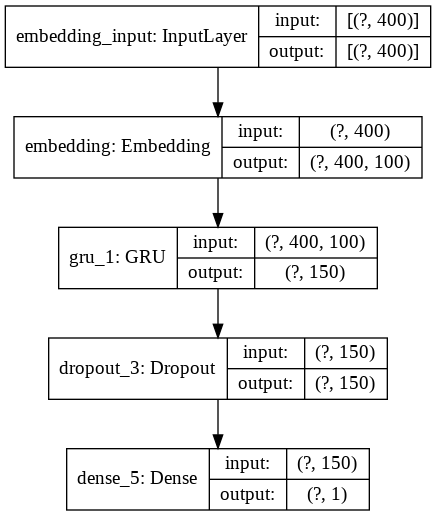

In [ ]:
gru_only = create_gru(regress=False)

x = Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation="linear")(gru_only.output)


model_text = Model(inputs = gru_only.input, outputs=x)

adam = optimizers.Adam(lr=1e-3, decay=1e-6)

model_text.compile(loss="mse", optimizer="adam")
model_text.summary()

model_story_text = model_text.fit(
    
    x = X_tr_int_pad, y = y_train,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_split=VAL_SPLIT
)

plot_model(model_text, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Test loss: 0.12017649412155151


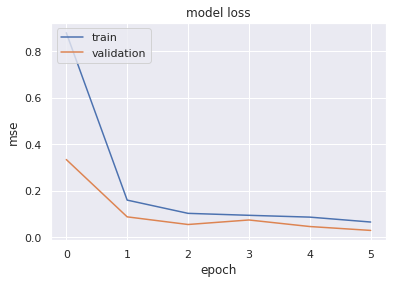

In [ ]:
 # Evaluate the model 

SCORE_BAG.update( {'M3': diag_model(model_text, model_story, X_ts_int_pad, y_test)})

# save the evaluation result to a variable

score_full_test_text = model_text.evaluate(X_ts_int_pad, y_test, verbose=0)

# save loss at each epoch to a variable
loss_gru = model_story_text.history['loss']

# save validation loss at each epoch to a variable
valid_loss_gru = model_story_text.history['val_loss']

# Linear Regression as a benchmark

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

# train the linear regression as a benchmark
X_trainNum_new, X_testNum_valid, y_train_new, y_test_valid = train_test_split(X_trainNum, y_train, test_size=0.25, random_state=111)

reg = LinearRegression().fit(X_trainNum_new, y_train_new)

print(mean_squared_error(reg.predict(X_trainNum_new), y_train_new))

print(mean_squared_error(reg.predict(X_testNum_valid), y_test_valid))

print(mean_squared_error(reg.predict(X_testNum), y_test))


0.6102396428651934
0.6623625352842067
0.7415651402473444


#3. Results 
The Table 1. shows the results for 3 different models. On only with text data -  GRU, one only numerical data - MLP and one with both types of data - MLP and GRU. The best performance on all three different sets was obtained with MLP and GRU model exceeding all of the modes considerably, obtaining 0.0663, 0.0303, and 0.0479 in training, validation and test loss respectively. It shows us that it makes sesne to use all different type of data because we get better predictions and were able go actually obtain added value from text data. Other training losses for separate MLP and GRU models obtained 0.1838 and 0.1548 respectively. The validation loss for GRU was much higher and achieved 0.1724 whereas the MLP 0.1115. The Test loss was pretty similar for both reaching 0.1443 for MLP and 0.1202 for GRU. It is hard to decide which model is the second best since the differences are not so big and for different datasets we have a different second best model. 
The worse predictions were given by the simple linear regression model trained only on the numerical data. Where the training loss only roughly ten times higher than of the combined MLP and GRU, reaching 0.6102, the validation and test losses were more than 15 times higher than those of the   MLP combined with GRU reaching 0.6624 and 0.7416 respectively. Also our MLP model trained on only numerical data gets much better results than the Linear Regression what shows that the neural networks models have strong predictive accuracy. 



Table 1. MSE for different models

Model| Training loss | Validation loss | Test loss
--- | --- | --- | ---
**MLP and GRU** | 0.0663 | 0.0303 |0.0479
**MLP** | 0.1718 | 0.1115 |0.1443
**GRU** | 0.1491 | 0.1724 |0.1202
**Linear Regression** | 0.6102 | 0.6624 |0.7416





Since the MLP and GRU model is the best we make our final prediction based on that model. We first predict the values for our validation set and reverse the standardization to match the real scale. The model might not be perfect, so it will probalby happen that there will be some negative predictions. As we know that there cannot be a negative number of claps we decide to assign value zero to those negative claps to improve the accuracy. In the end we save the predictions in a matching format to a file.

In [ ]:
# Predict the values based on the model 
final_results = model.predict([X_validNum, X_valid_int_pad])*std_y + mean_y

# Convert an array to a dataframe
final_results = pd.DataFrame(final_results)

# Reanme the columns 
final_results = final_results.rename(columns={0: 'Claps'})

# define a function no_minus
def no_minus(dataframe):
  '''
  function no_minus assigns 0 values to those predictions that have been negative
  '''
  if (dataframe <0):
    dataframe = 0 
  return dataframe

# Apply the no_minus function
final_results['Claps'] = final_results['Claps'].apply(no_minus)

# Add index name to index 
final_results.index.name = 'index'

print(final_results)

# Save results to a file 
final_results.to_csv(DATA_DIR + 'Results.csv', index = True)

              Claps
index              
0      88119.492188
1      32976.093750
2      13727.019531
3      19806.917969
4       1688.285645
...             ...
509    22301.578125
510     3646.228760
511      835.781433
512    11981.211914
513     3375.269775

[514 rows x 1 columns]


# 4. References 
[1] 1.17. Neural network models (supervised) — scikit-learn 0.23.2 documentation [WWW Document], n.d. URL https://scikit-learn.org/stable/modules/neural_networks_supervised.html (accessed 8.26.20).

[2] All you need to know about text preprocessing for NLP and Machine Learning, n.d. . KDnuggets. URL https://www.kdnuggets.com/all-you-need-to-know-about-text-preprocessing-for-nlp-and-machine-learning.html/ (accessed 8.26.20).

[3] An Ultimate Guide To Transfer Learning In NLP [WWW Document], 2019. . TOPBOTS. URL https://www.topbots.com/transfer-learning-in-nlp/ (accessed 8.26.20).

[4] Brownlee, J., 2019. How to use Data Scaling Improve Deep Learning Model Stability and Performance. Machine Learning Mastery. URL https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/ (accessed 8.26.20).

[5] Comparative study of word embedding methods in topic segmentation - ScienceDirect [WWW Document], n.d. URL https://www.sciencedirect.com/science/article/pii/S1877050917313480 (accessed 8.7.20).


[6] Figure 3: Bag-Of-Words (BOW) representation of the input that is next... [WWW Document], n.d. . ResearchGate. URL https://www.researchgate.net/figure/Bag-Of-Words-BOW-representation-of-the-input-that-is-next-follow-by-Softmax_fig2_308884219 (accessed 8.26.20).

[7] Foote, K.D., 2019. A Brief History of Natural Language Processing (NLP). DATAVERSITY. URL https://www.dataversity.net/a-brief-history-of-natural-language-processing-nlp/ (accessed 8.2.20).

[8] Gharibi, M., 2020. The Magic Behind Embedding Models [WWW Document]. Medium. URL https://towardsdatascience.com/the-magic-behind-embedding-models-c3af62f71fb (accessed 8.26.20).

[9] GloVe Word Embeddings [WWW Document], n.d. URL http://text2vec.org/glove.html (accessed 8.26.20).

[10] Humboldt-WI/adams [WWW Document], n.d. . GitHub. URL https://github.com/Humboldt-WI/adams (accessed 8.26.20a).


[11] Laasch_Master_2018.pdf, n.d.
Mikolov, T., Sutskever, I., Chen, K., Corrado, G.S., Dean, J., 2013. Distributed Representations of Words and Phrases and their Compositionality, in: Burges, C.J.C., Bottou, L., Welling, M., Ghahramani, Z., Weinberger, K.Q. (Eds.), Advances in Neural Information Processing Systems 26. Curran Associates, Inc., pp. 3111–3119.

[12] Nandakumar, N., Salehi, B., Baldwin, T., 2018. A Comparative Study of Embedding Models in Predicting the Compositionality of Multiword Expressions, in: Proceedings of the Australasian Language Technology Association Workshop 2018. Presented at the ALTA 2018, Dunedin, New Zealand, pp. 71–76.

[13] Pennington, J., Socher, R., Manning, C., 2014. Glove: Global Vectors for Word Representation, in: Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP). Presented at the Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), Association for Computational Linguistics, Doha, Qatar, pp. 1532–1543. https://doi.org/10.3115/v1/D14-1162

[14] Recent Trends in Deep Learning Based Natural Language Processing [Review Article] - IEEE Journals & Magazine [WWW Document], n.d. URL https://ieeexplore.ieee.org/document/8416973 (accessed 8.2.20).

[15] Sarkar, D. (DJ), 2018. A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning [WWW Document]. Medium. URL https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a (accessed 8.7.20).



[16] The parallelogram model of analogy completes the analogy king : queen... | Download Scientific Diagram [WWW Document], n.d. URL https://www.researchgate.net/figure/The-parallelogram-model-of-analogy-completes-the-analogy-king-queen-man-by_fig2_316921211 (accessed 8.26.20).

[17] What is Tokenization | Tokenization In NLP, 2020. . Analytics Vidhya. URL https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/ (accessed 8.26.20).

[18] Word Embeddings - Methoden zur Repräsentation von Wörtern in Algorithmen und neuronalen Netzen, 2019. . JAAI.de. URL https://jaai.de/word-embeddings-worteinbettung-word2vec-glove-bag-of-words-1872/ (accessed 8.26.20).


[19] Yin, Z., Shen, Y., 2018. On the Dimensionality of Word Embedding, in: Bengio, S., Wallach, H., Larochelle, H., Grauman, K., Cesa-Bianchi, N., Garnett, R. (Eds.), Advances in Neural Information Processing Systems 31. Curran Associates, Inc., pp. 887–898.


[20] fdeloche, 2017. English: A diagram for a one-unit Gated Recurrent Unit (GRU). From bottom to top : input state, hidden state, output state. Gates are sigmoïds or hyperbolic tangents. Other operators : element-wise plus and multiplication. Weights are not displayed.Inspired from Understanding LSTM, Blog of C. Olah.

[21] Howard, J., Ruder, S., 2018. Universal Language Model Fine-tuning for Text Classification, in: Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers). Presented at the ACL 2018, Association for Computational Linguistics, Melbourne, Australia, pp. 328–339. https://doi.org/10.18653/v1/P18-1031
